Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [7]:
print(transactions.shape)
transactions.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
print(item_categories.shape)
item_categories.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [98]:
%%time
transactions.date = pd.to_datetime(transactions.date, format='%d.%m.%y')
transactions['year'] = [d.year for d in transactions.date]
transactions['month'] = [d.month for d in transactions.date]
transactions['dayofweek'] = [d.isoweekday() for d in transactions.date]
transactions['day'] = [d.day for d in transactions.date]

CPU times: user 1min 13s, sys: 628 ms, total: 1min 14s
Wall time: 1min 14s


In [99]:
transactions['revenue'] = transactions.item_cnt_day * transactions.item_price
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,dayofweek,day,revenue
0,2013-02-01,0,59,22154,999.00,1.0,2013,2,5,1,999.00
1,2013-03-01,0,25,2552,899.00,1.0,2013,3,5,1,899.00
2,2013-05-01,0,25,2552,899.00,-1.0,2013,5,3,1,-899.00
3,2013-06-01,0,25,2554,1709.05,1.0,2013,6,6,1,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,2,15,1099.00


In [100]:
max_revenue = transactions[(transactions['year'] == 2014) & (transactions['month'] == 9)].groupby(['shop_id'])['revenue'].sum().max()
print(max_revenue)
grader.submit_tag('max_revenue', max_revenue)

7785688.0
Current answer for task max_revenue is: 7785688.0


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [101]:
# YOUR CODE GOES HERE
category_id_with_max_revenue = transactions[(transactions['year'] == 2014) & (transactions['month'].
                                                                              isin(np.arange(6, 9)))].groupby(['item_id'])['revenue'].sum().argmax()
print(category_id_with_max_revenue)
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

6675
Current answer for task category_id_with_max_revenue is: 6675


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [102]:
num_items_constant_price = sum([1 if item == 0 else 0 for item in transactions.groupby(['item_id'])['item_price'].std()])
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 3555


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

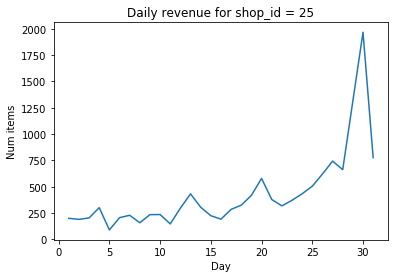

Current answer for task total_num_items_sold_var is: 119526.575862


In [103]:
shop_id = 25

total_num_items_sold = transactions[(transactions.month==12) & (transactions.year==2014) & (transactions.shop_id==25)].groupby(['day'])['item_cnt_day'].sum()
days = [day[0] for day in transactions[(transactions.month==12) & (transactions.year==2014) & (transactions.shop_id==25)].groupby(['day'])]

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [93]:
STUDENT_EMAIL = 'tiir57@yandex.ru'
STUDENT_TOKEN = '6GTQc8NdLhAV9g5g'
grader.status()

You want to submit these numbers:
Task max_revenue: 7785688.0
Task category_id_with_max_revenue: 6675
Task num_items_constant_price: 3555
Task total_num_items_sold_var: 119526.575862


In [94]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)